In [29]:
import argparse
import os
import subprocess

import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim as optim
from torchlars import LARS
from tqdm import tqdm

from configs import get_datasets
from critic import LinearCritic
from evaluate import save_checkpoint,save_checkpoint2, encode_train_set, train_clf, test
from models import *
from scheduler import CosineAnnealingWithLinearRampLR
from augmentation import ManualNormalise, DifferentiableColourDistortionByTorch_manual, gen_lambda
from torchvision import transforms

import torch.autograd as autograd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [8]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth99 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 100


gradient_penalty: 0.00202 ,  loss: 5.486: ██████████| 98/98 [01:33<00:00,  1.04it/s]


In [17]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth199 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 200


gradient_penalty: 0.00193 ,  loss: 5.429: ██████████| 98/98 [01:34<00:00,  1.04it/s]


In [18]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth299 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 300


gradient_penalty: 0.00194 ,  loss: 5.398: ██████████| 98/98 [01:35<00:00,  1.02it/s]


In [19]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth399 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 400


gradient_penalty: 0.00192 ,  loss: 5.374: ██████████| 98/98 [01:38<00:00,  1.01s/it]


In [20]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth499 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 500


gradient_penalty: 0.00197 ,  loss: 5.355: ██████████| 98/98 [01:39<00:00,  1.01s/it]


In [21]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth599 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 600


gradient_penalty: 0.00197 ,  loss: 5.341: ██████████| 98/98 [01:39<00:00,  1.01s/it]


In [22]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth699 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 700


gradient_penalty: 0.00205 ,  loss: 5.333: ██████████| 98/98 [01:38<00:00,  1.01s/it]


In [23]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth799 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 800


gradient_penalty: 0.00214 ,  loss: 5.324: ██████████| 98/98 [01:39<00:00,  1.01s/it]


In [24]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth899 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 900


gradient_penalty: 0.00237 ,  loss: 5.333: ██████████| 98/98 [01:39<00:00,  1.01s/it]


In [25]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_new.pth999 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 1000


gradient_penalty: 0.00280 ,  loss: 5.358: ██████████| 98/98 [01:39<00:00,  1.01s/it]


# Gradient Penalty for new baseline aam simclr

In [9]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth99 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 100


gradient_penalty: 0.00150 ,  loss: 5.462: ██████████| 98/98 [01:35<00:00,  1.02it/s]


In [10]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth199 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 200


gradient_penalty: 0.00145 ,  loss: 5.403: ██████████| 98/98 [01:38<00:00,  1.00s/it]


In [11]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth299 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 300


gradient_penalty: 0.00148 ,  loss: 5.369: ██████████| 98/98 [01:38<00:00,  1.01s/it]


In [12]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth399 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 400


gradient_penalty: 0.00148 ,  loss: 5.345: ██████████| 98/98 [01:39<00:00,  1.01s/it]


In [13]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth499 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 500


gradient_penalty: 0.00145 ,  loss: 5.323: ██████████| 98/98 [01:39<00:00,  1.01s/it]


In [14]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth599 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 600


gradient_penalty: 0.00146 ,  loss: 5.311: ██████████| 98/98 [01:39<00:00,  1.01s/it]


In [15]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth699 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 700


gradient_penalty: 0.00144 ,  loss: 5.298: ██████████| 98/98 [01:39<00:00,  1.01s/it]


In [16]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth799 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 800


gradient_penalty: 0.00142 ,  loss: 5.285: ██████████| 98/98 [01:39<00:00,  1.02s/it]


In [63]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth899 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 900


gradient_penalty: 0.00138 ,  loss: 5.278: ██████████| 98/98 [01:37<00:00,  1.00it/s]


In [64]:
%run calgradient.py --arch resnet18 --num-epochs 1000 --cosine-anneal --norm 1 --resume resnet18_aam_new_baseline_rerun.pth999 --lambda-gp 0

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Epoch: 1000


gradient_penalty: 0.00142 ,  loss: 5.279: ██████████| 98/98 [01:40<00:00,  1.02s/it]


In [42]:
rainset, testset, clftrainset, num_classes, stem = get_datasets(args.dataset)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=args.batch_size, shuffle=True,
                                          num_workers=args.num_workers, pin_memory=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False, num_workers=args.num_workers,
                                         pin_memory=True)
clftrainloader = torch.utils.data.DataLoader(clftrainset, batch_size=1000, shuffle=False, num_workers=args.num_workers,
                                             pin_memory=True)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [44]:
def cal_accuracy(file):
    resume_from = os.path.join('./checkpoint', file)
    checkpoint = torch.load(resume_from)
    net = ResNet18(stem=stem)
    net.to(device)
    if device == 'cuda':
        repr_dim = net.representation_dim
        net = torch.nn.DataParallel(net)
        net.representation_dim = repr_dim
        cudnn.benchmark = True
    
    net.load_state_dict(checkpoint['net'])
    
    X, y = encode_train_set(clftrainloader, device, net)
    clf = train_clf(X, y, net.representation_dim, num_classes, device, reg_weight=1e-5)
    acc = test(testloader, device, net, clf)
    print('acc : {} '.format(acc))
    return acc

In [52]:
filelist_aam = ['resnet18_aam_new_baseline_rerun.pth99']+ ['resnet18_aam_new_baseline_rerun.pth' + str(i) + '99' for i in range(1,10)]
filelist_simclr = ['resnet18_new.pth99']+ ['resnet18_new.pth' + str(i) + '99' for i in range(1,10)]

In [60]:
acc_aam = []
for file in filelist_aam:
    print(file)
    temp_acc = cal_accuracy(file)
    acc_aam.append(temp_acc)

resnet18_aam_new_baseline_rerun.pth99


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.61it/s]
Loss: 0.770 | Train Acc: 72.440% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.492 | Train Acc: 82.968% : ██████████| 500/500 [00:59<00:00,  8.35it/s] 
Loss: 0.586 | Test Acc: 80.020% : ██████████| 10/10 [00:01<00:00,  5.73it/s]


acc : 80.02 
resnet18_aam_new_baseline_rerun.pth199


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.79it/s]
Loss: 0.638 | Train Acc: 77.064% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.404 | Train Acc: 85.966% : ██████████| 500/500 [00:39<00:00, 12.73it/s] 
Loss: 0.501 | Test Acc: 82.460% : ██████████| 10/10 [00:01<00:00,  5.75it/s]


acc : 82.46 
resnet18_aam_new_baseline_rerun.pth299


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.81it/s]
Loss: 0.509 | Train Acc: 81.984% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.355 | Train Acc: 87.752% : ██████████| 500/500 [00:14<00:00, 35.21it/s] 
Loss: 0.446 | Test Acc: 84.600% : ██████████| 10/10 [00:01<00:00,  5.70it/s]


acc : 84.6 
resnet18_aam_new_baseline_rerun.pth399


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.75it/s]
Loss: 0.445 | Train Acc: 84.264% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.327 | Train Acc: 88.794% : ██████████| 500/500 [00:08<00:00, 62.48it/s] 
Loss: 0.416 | Test Acc: 85.660% : ██████████| 10/10 [00:01<00:00,  5.62it/s]


acc : 85.66 
resnet18_aam_new_baseline_rerun.pth499


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.71it/s]
Loss: 0.441 | Train Acc: 84.560% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.305 | Train Acc: 89.558% : ██████████| 500/500 [00:07<00:00, 70.20it/s] 
Loss: 0.397 | Test Acc: 86.120% : ██████████| 10/10 [00:01<00:00,  5.45it/s]


acc : 86.12 
resnet18_aam_new_baseline_rerun.pth599


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.60it/s]
Loss: 0.392 | Train Acc: 86.316% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.291 | Train Acc: 90.176% : ██████████| 500/500 [00:06<00:00, 76.36it/s] 
Loss: 0.380 | Test Acc: 87.040% : ██████████| 10/10 [00:01<00:00,  5.46it/s]


acc : 87.04 
resnet18_aam_new_baseline_rerun.pth699


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.61it/s]
Loss: 0.383 | Train Acc: 86.518% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.280 | Train Acc: 90.488% : ██████████| 500/500 [00:06<00:00, 81.83it/s] 
Loss: 0.375 | Test Acc: 87.190% : ██████████| 10/10 [00:01<00:00,  5.42it/s]


acc : 87.19 
resnet18_aam_new_baseline_rerun.pth799


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.59it/s]
Loss: 0.353 | Train Acc: 87.572% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.275 | Train Acc: 90.670% : ██████████| 500/500 [00:06<00:00, 80.92it/s] 
Loss: 0.368 | Test Acc: 87.490% : ██████████| 10/10 [00:01<00:00,  5.52it/s]


acc : 87.49 
resnet18_aam_new_baseline_rerun.pth899


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.57it/s]
Loss: 0.360 | Train Acc: 87.416% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.271 | Train Acc: 90.850% : ██████████| 500/500 [00:05<00:00, 85.28it/s] 
Loss: 0.365 | Test Acc: 87.530% : ██████████| 10/10 [00:01<00:00,  5.64it/s]


acc : 87.53 
resnet18_aam_new_baseline_rerun.pth999


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.63it/s]
Loss: 0.367 | Train Acc: 87.272% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.270 | Train Acc: 90.798% : ██████████| 500/500 [00:05<00:00, 94.93it/s] 
Loss: 0.365 | Test Acc: 87.540% : ██████████| 10/10 [00:01<00:00,  5.32it/s]

acc : 87.54 


In [59]:
acc_simclr = []
for file in filelist_simclr:
    print(file)
    temp_acc = cal_accuracy(file)
    acc_simclr.append(temp_acc)

resnet18_new.pth99


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.91it/s]
Loss: 0.774 | Train Acc: 72.286% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.496 | Train Acc: 82.788% : ██████████| 500/500 [00:49<00:00, 10.05it/s] 
Loss: 0.585 | Test Acc: 79.560% : ██████████| 10/10 [00:01<00:00,  5.62it/s]


acc : 79.56 
resnet18_new.pth199


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.87it/s]
Loss: 0.661 | Train Acc: 76.470% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.408 | Train Acc: 85.912% : ██████████| 500/500 [00:39<00:00, 12.70it/s] 
Loss: 0.503 | Test Acc: 82.250% : ██████████| 10/10 [00:01<00:00,  5.69it/s]


acc : 82.25 
resnet18_new.pth299


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.83it/s]
Loss: 0.574 | Train Acc: 80.022% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.376 | Train Acc: 87.184% : ██████████| 500/500 [00:13<00:00, 35.72it/s] 
Loss: 0.461 | Test Acc: 84.170% : ██████████| 10/10 [00:01<00:00,  5.68it/s]


acc : 84.17 
resnet18_new.pth399


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.86it/s]
Loss: 0.483 | Train Acc: 83.196% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.349 | Train Acc: 88.408% : ██████████| 500/500 [00:08<00:00, 61.62it/s] 
Loss: 0.436 | Test Acc: 84.780% : ██████████| 10/10 [00:01<00:00,  5.69it/s]


acc : 84.78 
resnet18_new.pth499


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.80it/s]
Loss: 0.427 | Train Acc: 85.174% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.320 | Train Acc: 89.272% : ██████████| 500/500 [00:07<00:00, 66.05it/s] 
Loss: 0.408 | Test Acc: 86.340% : ██████████| 10/10 [00:01<00:00,  5.79it/s]


acc : 86.34 
resnet18_new.pth599


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.78it/s]
Loss: 0.397 | Train Acc: 86.454% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.313 | Train Acc: 89.632% : ██████████| 500/500 [00:06<00:00, 79.13it/s] 
Loss: 0.401 | Test Acc: 86.250% : ██████████| 10/10 [00:01<00:00,  5.76it/s]


acc : 86.25 
resnet18_new.pth699


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.79it/s]
Loss: 0.408 | Train Acc: 85.926% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.302 | Train Acc: 89.932% : ██████████| 500/500 [00:06<00:00, 80.77it/s] 
Loss: 0.392 | Test Acc: 86.770% : ██████████| 10/10 [00:01<00:00,  5.52it/s]


acc : 86.77 
resnet18_new.pth799


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.79it/s]
Loss: 0.395 | Train Acc: 86.646% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.297 | Train Acc: 90.146% : ██████████| 500/500 [00:05<00:00, 85.73it/s] 
Loss: 0.388 | Test Acc: 86.880% : ██████████| 10/10 [00:01<00:00,  5.69it/s]


acc : 86.88 
resnet18_new.pth899


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.68it/s]
Loss: 0.405 | Train Acc: 86.368% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.293 | Train Acc: 90.226% : ██████████| 500/500 [00:04<00:00, 100.01it/s]
Loss: 0.387 | Test Acc: 86.930% : ██████████| 10/10 [00:01<00:00,  5.54it/s]


acc : 86.93 
resnet18_new.pth999


Encoded 49/50: ██████████| 50/50 [00:07<00:00,  6.61it/s]
Loss: 0.388 | Train Acc: 86.736% :           | 0/500 [00:00<?, ?it/s]


L2 Regularization weight: 1e-05


Loss: 0.294 | Train Acc: 90.194% : ██████████| 500/500 [00:04<00:00, 106.48it/s]
Loss: 0.387 | Test Acc: 86.790% : ██████████| 10/10 [00:01<00:00,  5.54it/s]

acc : 86.79 


# Plot !

these number came from one run, so if we run the notebook again, the number may change !

In [74]:
acc_aam = [80.02, 82.46, 84.6, 85.66, 86.12, 87.04, 87.19, 87.49, 87.53, 87.54 ]
acc_simclr = [79.56, 82.25, 84.17,  84.78, 86.34, 86.25, 86.77, 86.88, 86.93, 86.79 ]
epochs = [100*i for i in range(1,11)]

gp_simclr = [0.00202, 0.00193, 0.00194 ,0.00192, 0.00197,0.00197,0.00205,0.00214 ,0.00237, 0.00280]
loss_simclr = [5.486, 5.429, 5.398, 5.374, 5.355, 5.341, 5.333, 5.324, 5.333, 5.358]

gp_aam = [0.00150, 0.00145, 0.00148, 0.00148, 0.00145, 0.00146, 0.00144, 0.00142 ,0.00138, 0.00142 ]
loss_aam = [5.462, 5.403, 5.369, 5.345, 5.323 ,5.311 ,5.298 ,5.285, 5.278, 5.279]

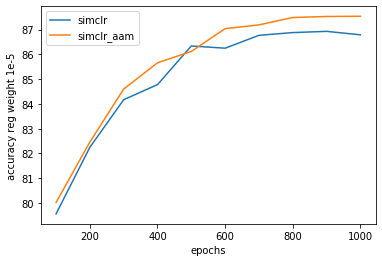

In [78]:
plt.plot(epochs,acc_simclr, label = 'simclr')
plt.plot(epochs,acc_aam, label = 'simclr_aam')
plt.xlabel('epochs')
plt.ylabel('accuracy reg weight 1e-5')
plt.legend()
plt.show()

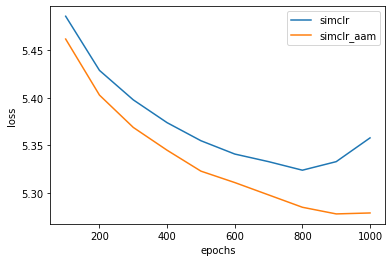

In [79]:
plt.plot(epochs,loss_simclr, label = 'simclr')
plt.plot(epochs,loss_aam, label = 'simclr_aam')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

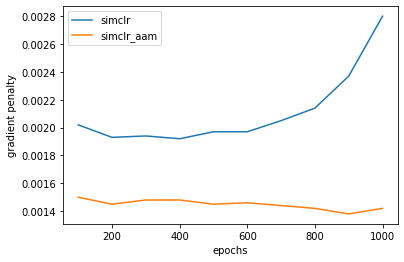

In [80]:
plt.plot(epochs,gp_simclr, label = 'simclr')
plt.plot(epochs,gp_aam, label = 'simclr_aam')
plt.xlabel('epochs')
plt.ylabel('gradient penalty')
plt.legend()
plt.show()